In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def getFunction(x, a, b, c):
    return x, a*(1.+(x/b)**2)**(-c)
def getFTFunction(ks, a, b, c):
	import scipy.special
	return ks, 2**(1.-c)*a/(b**2)**(-1./4.-c/2.)*abs(ks)**(-1./2.+c)*scipy.special.kv(1./2.-c, np.array(abs(ks)*abs(b)), dtype=np.complex)/scipy.special.gamma(np.complex(c))


In [3]:
functionReal = lambda x,p: getFunction(x, *p)
functionFourier = lambda x,p: getFTFunction(x, *p)
constants = [5e-10, 26., 0.73]

$P(x)=a\left(1+\left(\frac{x}{b}\right)^2\right)^{-c} \\
\hat{P}(k)=\frac{2^{1-c}{a}{b^{2\left(\frac{1}{4}+\frac{c}{2}\right)}}|k|^{-\frac{1}{2}+c} K_v\left(\frac{1}{2}-c,k|b|\right)}{\Gamma(c)}$

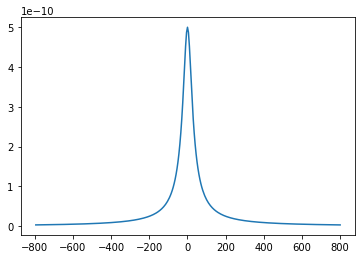

In [4]:
n = 320
KpcInCm = 3.086e21
deltax = 5.
x1 = (-(n)/2 + 1)*deltax;
grid = np.arange(x1, x1+(n)*deltax, deltax)
grid, samples = functionReal(grid, constants)
plt.plot(*functionReal(grid,constants));


In [5]:
factor = np.sqrt(n/(2*np.pi))*deltax*np.exp(-2*np.pi*np.complex(0,1)*x1/(n*deltax)*np.arange(0, n))
transform = np.fft.fft(samples, norm='ortho') * factor
ks = np.fft.fftfreq(n, d = deltax)*2*np.pi

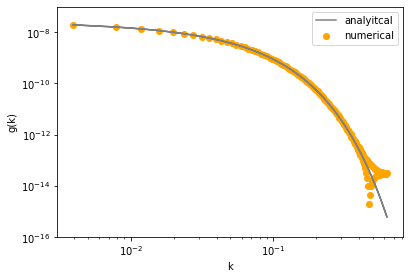

In [6]:
fig = plt.figure()
ax = plt.axes([0.15,0.15,0.8,.8])
ax.plot(abs(ks), abs(functionFourier(ks,constants)[1])**1, c='gray', label='analyitcal')
ax.scatter(*np.array([ks,abs(transform)**1]), c='orange', label='numerical')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('k')
ax.set_ylabel('g(k)')
ax.set_ylim([1e-16,1e-7])
ax.legend()
fig.savefig('TestingFourierAnalyticsPressureProfileGXPython.pdf', dpi=450)
plt.show()